In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## TRAIN

In [2]:
df_desconhecidos = pd.read_csv("faces_desconhecidos.csv")

In [3]:
df_conhecidos = pd.read_csv("faces.csv")

In [4]:
df = pd.concat([df_desconhecidos, df_conhecidos])

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-0.028100,1.874009,0.975083,0.602640,0.651621,0.387701,0.754534,0.255482,0.570138,0.232678,...,0.000564,-1.750562,-0.740965,-1.333565,0.424362,1.464125,0.441541,0.117519,0.773804,desconhecidos
1,0.281798,0.222542,-0.637775,-1.389234,-0.944202,1.170996,-2.149016,0.207373,1.258633,1.118211,...,-2.077074,0.061272,0.858069,-0.620240,-0.448048,0.659152,-0.578539,0.022662,-1.110150,desconhecidos
2,-0.469598,-0.438383,1.035088,0.419017,-2.502093,1.199449,1.220177,-0.849276,-2.125674,0.487827,...,-0.075716,-0.870743,-0.749646,-0.024553,0.895486,-0.095862,1.756820,-0.284382,1.243302,desconhecidos
3,-0.019212,0.063674,0.368226,-0.734526,-1.221279,-1.026126,2.541132,-0.602338,0.804724,-1.249530,...,-1.705541,1.118912,0.027196,0.776124,0.068407,-0.755236,-0.928870,-2.261591,-1.204839,desconhecidos
4,0.792076,-1.098803,-1.363440,-0.442606,-1.206599,0.595012,-0.013578,0.476706,-1.628913,-0.248366,...,-1.437911,0.343600,1.075108,0.339993,0.843487,0.041740,1.926534,-0.437672,0.653635,desconhecidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0.588910,0.361084,0.012566,-0.197213,1.255946,-0.736539,1.375485,-1.082598,-0.736240,0.979192,...,-2.016208,2.359462,1.672926,1.523849,-1.695331,-0.579944,-1.463620,-0.273856,-0.077989,sandeco
738,0.279390,-0.631681,0.529013,0.322209,0.741457,-1.208276,0.574493,-1.422432,-0.647154,0.656584,...,-2.191542,1.913249,0.485100,0.890981,-0.898901,0.278784,-0.330889,-0.117583,-0.448477,sandeco
739,0.459297,-0.965061,-0.285542,0.726998,1.004078,0.559699,2.052253,-0.635242,-0.491427,1.681205,...,-0.842883,2.727129,-0.202562,-0.404566,-0.809246,0.149799,-1.954735,-0.539354,-0.742241,sandeco
740,0.723891,-0.439264,-0.245565,-0.074947,0.334989,-0.278425,1.452018,-0.042754,-0.841918,1.394581,...,0.059598,1.547364,-0.224165,-1.124514,0.630465,-0.158258,-0.599097,-0.549221,-1.407454,sandeco


In [6]:
X = np.array(df.drop("target", axis=1))
y = np.array(df.target)

In [7]:
X

array([[-0.02810006,  1.874009  ,  0.9750827 , ...,  0.44154063,
         0.11751907,  0.7738039 ],
       [ 0.28179818,  0.22254208, -0.63777477, ..., -0.57853884,
         0.02266233, -1.1101495 ],
       [-0.4695979 , -0.4383834 ,  1.0350882 , ...,  1.7568198 ,
        -0.28438193,  1.2433019 ],
       ...,
       [ 0.45929727, -0.9650612 , -0.28554234, ..., -1.9547353 ,
        -0.5393536 , -0.7422413 ],
       [ 0.72389114, -0.43926418, -0.24556531, ..., -0.5990966 ,
        -0.5492207 , -1.4074541 ],
       [ 0.72558177, -0.72507775, -0.10591349, ..., -0.43275157,
        -0.8824783 , -1.2174921 ]])

In [8]:
y

array(['desconhecidos', 'desconhecidos', 'desconhecidos', ..., 'sandeco',
       'sandeco', 'sandeco'], dtype=object)

In [9]:
print(X.shape)
print(y.shape)

(29775, 128)
(29775,)


## MISTURANDO TUDO

In [10]:
from sklearn.utils import shuffle

In [11]:
X, y = shuffle(X, y, random_state=0)

## SPLIT DATASET

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
trainX, valX, trainY, valY = train_test_split(X, y, test_size=0.20, random_state=42)

### NORMALIZANDO

In [14]:
from sklearn.preprocessing import Normalizer

In [15]:
norm = Normalizer(norm="l2")
trainX = norm.transform(trainX)
valX = norm.transform(valX)

## TRATANDO LABELS

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
np.unique(trainY)

array(['desconhecidos', 'etiene', 'sandeco'], dtype=object)

In [18]:
classes = len(np.unique(trainY))
classes

3

### Discretizando

In [19]:
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainY)
trainY = out_encoder.transform(trainY)
np.unique(trainY)

array([0, 1, 2])

In [20]:
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(valY)
valY = out_encoder.transform(valY)
np.unique(valY)

array([0, 1, 2])

## USANDO O KERAS

In [21]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
valY = to_categorical(valY)

In [22]:
print(valY[0])
print(trainY[0])

[1. 0. 0.]
[1. 0. 0.]


In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [24]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(classes, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 16,899
Trainable params: 16,899
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
batch_size=8
epochs= 40

history = model.fit(trainX, trainY,  
                    epochs=epochs, 
                    validation_data = (valX,valY), 
                    batch_size=batch_size)
                   

Train on 23820 samples, validate on 5955 samples
Epoch 1/40
23820/23820 [==============================] - 7s 283us/sample - loss: 0.0461 - acc: 0.9918 - val_loss: 0.0143 - val_acc: 0.9971
Epoch 2/40
23820/23820 [==============================] - 6s 269us/sample - loss: 0.0127 - acc: 0.9971 - val_loss: 0.0114 - val_acc: 0.9980
Epoch 3/40
23820/23820 [==============================] - 6s 259us/sample - loss: 0.0112 - acc: 0.9973 - val_loss: 0.0097 - val_acc: 0.9985
Epoch 4/40
23820/23820 [==============================] - 7s 281us/sample - loss: 0.0094 - acc: 0.9975 - val_loss: 0.0096 - val_acc: 0.9983
Epoch 5/40
23820/23820 [==============================] - 6s 260us/sample - loss: 0.0071 - acc: 0.9981 - val_loss: 0.0089 - val_acc: 0.9985
Epoch 6/40
23820/23820 [==============================] - 6s 271us/sample - loss: 0.0065 - acc: 0.9979 - val_loss: 0.0081 - val_acc: 0.9983
Epoch 7/40
23820/23820 [==============================] - 7s 279us/sample - loss: 0.0060 - acc: 0.9982 - val_lo

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

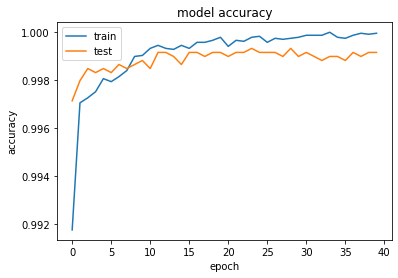

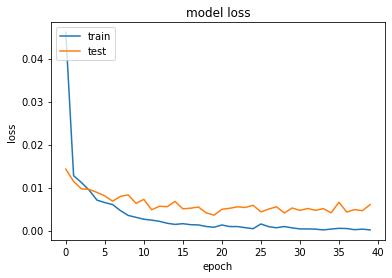

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
yhat_val = model.predict(valX)

In [40]:
valY = np.argmax(valY,axis = 1)
yhat_val = np.argmax(yhat_val,axis = 1)

print(valY[0])
print(yhat_val[0])

AxisError: axis 1 is out of bounds for array of dimension 1

In [41]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model_name, valY, yhat_val):
        
    cm = confusion_matrix(valY, yhat_val)
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    print("MODELO : {}".format(model_name))
    print("Acurácia: {:.4f}".format(acc))
    print("Sensitividade: {:.4f}".format(sensitivity))
    print("Especificidade: {:.4f}".format(specificity))

    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
    plt.show()

In [42]:
print_confusion_matrix("KERAS", valY, yhat_val)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

## SALVANDO O MODELO

In [34]:
model.save("faces_d.h5")